In [39]:
!python3 --version

Python 3.5.2


Total number of scenes is: 	 	 15
Number of non-uniform Pictures: 	 90
Number of uniform Pictures: 	 	 135


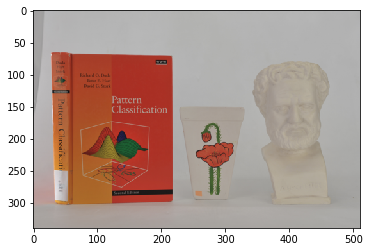

In [76]:
import matplotlib.pyplot as plt
from skimage.io import imread
import os
import glob
import numpy as np

nonuni_pics = []
uni_pics = []

# read all scene folders
total_folers = glob.glob("../Phos2_0_2MP/Phos2_scene*")
# check out how many folders are there
print("Total number of scenes is: \t \t", len(total_folers))

# read the image filenames according to the category (nonuniform and uniform)
for each_foler in total_folers:
    nonuni_path = os.path.join(each_foler, "*_nonuni_*.png")
    uni_path = os.path.join(dataset_dir, "*_uni_*.png")
    nonuni_pics += glob.glob(nonuni_path)
    uni_pics += glob.glob(uni_path)

# check out dataset size
print("Number of non-uniform Pictures: \t", len(nonuni_pics))
print("Number of uniform Pictures: \t \t", len(uni_pics))

'''
set classifier as:
1   ->   non-uniform
0   ->   uniform
'''
nonuni_imgs = []
nonuni_labels = []
uni_imgs = []
uni_labels = []

# set label for each nonuniform image
for each_nonuni in nonuni_pics:
    nonuni_imgs.append(imread(each_nonuni))
    nonuni_labels.append(1.)

# set label for each uniform image
for each_uni in uni_pics:
    uni_imgs.append(imread(each_uni))
    uni_labels.append(0.)

# make them into numpy arrays for further usage
nonuni_imgs = np.array(nonuni_imgs)
nonuni_labels = np.array(nonuni_labels)
uni_imgs = np.array(uni_imgs)
uni_labels = np.array(uni_labels)

# plot one of the images to check what the image looks like
plt.imshow(nonuni_imgs[0])
plt.show()

In [77]:
from sklearn.model_selection import train_test_split

'''
principle:
    60% selected as training dataset;
    20% selected as validation dataset;
    20% selected as test dataset.
'''

# split nonuniform images and labels into 3 sets
nonuni_Xtrain, nonuni_Xrest, nonuni_Ytrain, nonuni_Yrest = train_test_split(\
                nonuni_imgs, nonuni_labels, test_size=0.4, random_state=42)

nonuni_Xvalidation, nonuni_Xtest, nonuni_Yvalidation, nonuni_Ytest = train_test_split(\
                nonuni_Xrest, nonuni_Yrest, test_size=0.5, random_state=42)

# split uniform images and labels into 3 sets
uni_Xtrain, uni_Xrest, uni_Ytrain, uni_Yrest = train_test_split(\
                uni_imgs, uni_labels, test_size=0.4, random_state=42)

uni_Xvalidation, uni_Xtest, uni_Yvalidation, uni_Ytest = train_test_split(\
                uni_Xrest, uni_Yrest, test_size=0.5, random_state=42)

# combine nonuniform and uniform images into one set
X_train = np.concatenate([nonuni_Xtrain, uni_Xtrain], axis = 0)
X_validation = np.concatenate([nonuni_Xvalidation, uni_Xvalidation], axis = 0)
X_test = np.concatenate([nonuni_Xtest, uni_Xtest], axis = 0)

# combine nonuniform and uniform labels into one set
Y_train = np.concatenate([nonuni_Ytrain, uni_Ytrain], axis = 0)
Y_validation = np.concatenate([nonuni_Yvalidation, uni_Yvalidation], axis = 0)
Y_test = np.concatenate([nonuni_Ytest, uni_Ytest], axis = 0)

# set the index of all sets and shuffle them
ind_train = np.arange(len(X_train))
np.random.shuffle(ind_train)
ind_validation = np.arange(len(X_validation))
np.random.shuffle(ind_validation)
ind_test = np.arange(len(X_test))
np.random.shuffle(ind_test)

# shuffle the dataset
X_train, Y_train = X_train[ind_train], Y_train[ind_train]
X_validation, Y_validation = X_validation[ind_validation], Y_validation[ind_validation]
X_test, Y_test = X_test[ind_test], Y_test[ind_test]


print("Number of data used for training: \t", len(Y_train))
print("Number of data used for validation: \t", len(Y_validation))
print("Number of data used for test: \t \t", len(Y_test))


Number of data used for training: 	 135
Number of data used for validation: 	 45
Number of data used for test: 	 	 45


In [81]:
from sklearn.linear_model import LogisticRegression

def change_format(data):
    shape = data.shape
    return data.reshape((shape[0], -1))

X_train = change_format(X_train)
X_validation = change_format(X_validation)
X_test = change_format(X_test)

# all parameters not specified are set to their defaults
logistic_regression = LogisticRegression(solver = 'lbfgs')

# fit data into model
logistic_regression.fit(X_train, Y_train)

print("done")



done
